<h1 style="color:red;text-align:center;"> HAR prediction using Machine learning model </h1>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')


# 1. Getting train and test data

In [2]:
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print("Training dataset size : {}".format(train.shape))
print("Test dataset size : {}".format(test.shape))

Training dataset size : (7352, 564)
Test dataset size : (2947, 564)


In [3]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


# Making training and test data 

+ Removing subject, Activity, ActivityName from training set.
+ Dependent variable will be Activity name

In [4]:
# Making train data
X_train = train.drop(['subject','Activity','ActivityName'],axis=1)
y_train = train['ActivityName']
print(X_train.shape)
print(y_train.shape)

(7352, 561)
(7352,)


In [5]:
# Making test data
X_test = test.drop(['subject','Activity','ActivityName'],axis=1)
y_test = test['ActivityName']
print(X_test.shape)
print(y_test.shape)

(2947, 561)
(2947,)


<h1 style="color:red;text-align:center;"> Data Modeling </h1>

### 1. Labels that are useful in plotting confusion matrix

In [6]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### 2. Generic function to plot Confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
def plot_confusion_matrix(cm, classes, normlize =False, title='confusion matrix',cmap=plt.cm.Blues):
    
    if normlize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks,classes)
    bottom, top = plt.ylim()  # return the current ylim
    plt.ylim(bottom+0.4, top-0.4)     # set the ylim to bottom, top
    
    fmt = '.2f' if normlize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    

### 3. Generic function to run any model specified

In [8]:
from datetime import datetime
def perform_model(model, X_train,y_train, X_test, y_test, class_labels, cm_normlize=True,print_cm=True,cm_cmap=plt.cm.Greens):
    
    # To store results at various phase
    results  = dict()
    
    # Time when training starts
    train_start_time = datetime.now()
    print("\n\nTraining {} ....".format(model))
    model.fit(X_train,y_train)
    print("Training Done.\n")
    train_end_time = datetime.now()
    results['training_time'] = train_end_time -train_start_time
    print('Training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    # predicting on test set
    print("\nTesting {} ....".format(model))
    # Time when testing starts
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    print("Testing Done.\n")
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time -test_start_time
    print('Testing_time(HH:MM:SS.ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    
    # Calculation model accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy']=acc
    print("\nModel Accuracy : {}\n".format(acc))
    
    # confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print("Confusion Matrix")
        print(cm)
    
    #plot confusion_matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels,normlize=True,title="Nornmized confusion_matrix",cmap=cm_cmap)
    plt.show()
    
    # Getting classification report
    print(' '*25,'| Classifiction Report |')
    classi_report = classification_report(y_test,y_pred)
    results['classification_report']=classi_report
    print(classi_report)
    
    # adding trained model to results
    results['model'] = model
    
    return results

### 4. Generic function to print the gridsearch Attributes

In [9]:
from sklearn.model_selection import GridSearchCV 
def print_gridSearch_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print("Best Estimator : ",model.best_estimator_)
    print('\n\n')
    # parameters that gave best results while performing grid search
    print("Best parameters : ", model.best_params_)
    print('\n\n')
    #  number of cross validation splits
    print('Total number of cross validation sets',model.n_splits_)
    print('\n\n')
    # Average cross validated score of the best estimator, from the Grid Search 
    print('Average Cross Validate scores of best estimator (Best score)',model.best_score_)



<h1 style="color:red;text-align:center;"> Building Different Machine Learning Models </h1>

# 1. Logistic Regression with Hyperparameter tuning



Training GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 50],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1) ....
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.4min finished


Training Done.

Training_time(HH:MM:SS.ms) - 0:01:45.633471



Testing GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 50],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1) ....
Testing Done.

Testing_time(HH:MM:SS.ms) - 0:00

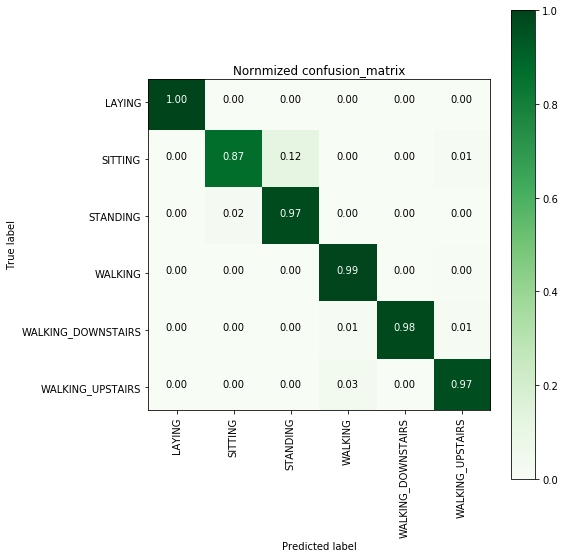

                          | Classifiction Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.96      0.99      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.96      0.96      2947



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 

# setting gridsearch hyperparams
params = {'C':[0.01,0.1,1,5,10,50],'penalty':['l2','l1']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=params, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_result = perform_model(log_reg_grid,X_train,y_train,X_test,y_test, class_labels=labels)



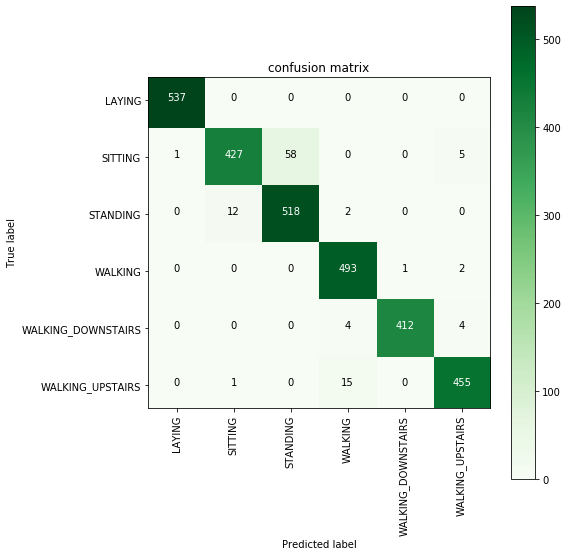

In [11]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_result['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [12]:
# observe the attributes of the model 
print_gridSearch_attributes(log_reg_grid_result['model'])


Best Estimator :  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)



Best parameters :  {'C': 10, 'penalty': 'l1'}



Total number of cross validation sets 3



Average Cross Validate scores of best estimator (Best score) 0.9460010881392819


<h1 style="color:green;text-align:left;">Observations: </h1>

+ Logistic Regression performs extreamly well for 'walking' and 'laying' activities.
+ 12% of the times it misclassifies 'sitting' as 'standing'.
+ 5% of the times it misclassifies 'walking upstairs' as 'walking'.
+ We got 94.50% accuracy using L2 regularization.
+ It took 01 minuts and 31 seconds for training the dataset. 
+ We need to modify our model such that misclassification error of sitting and standing activities is reduced.



# 2. Linear Support Vector Classifier with GridSearch¶



Training GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=5e-05, verbose=0),
             iid='warn', n_jobs=-1, param_grid={'C': [0.125, 0.5, 1, 2, 8, 16]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1) ....
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   25.8s finished


Training Done.

Training_time(HH:MM:SS.ms) - 0:00:33.674053



Testing GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=5e-05, verbose=0),
             iid='warn', n_jobs=-1, param_grid={'C': [0.125, 0.5, 1, 2, 8, 16]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1) ....
Testing Done.

Testing_time(HH:MM:SS.ms) - 0:00:00.010281



Model Accuracy : 0.9650492025788938

Confusion Matrix
[[537   0   0   0   0   0]
 [  2 423  62   0   0   4]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


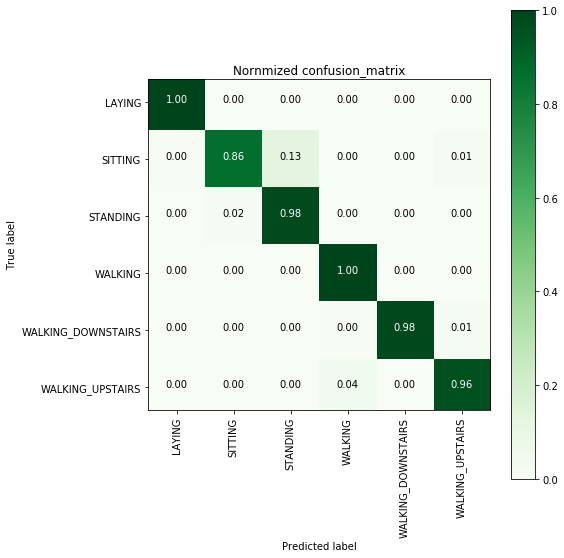

                          | Classifiction Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.97      2947
      weighted avg       0.97      0.97      0.96      2947



In [13]:
from sklearn.svm import LinearSVC

# tol= Tolerance for stopping criteria
lin_svc = LinearSVC(tol=0.00005)
params = {'C':[0.125,0.5,1,2,8,16]}
lin_svc_grid = GridSearchCV(lin_svc, param_grid=params, n_jobs=-1, verbose=1)
lin_svc_grid_results = perform_model(lin_svc_grid,X_train,y_train,X_test,y_test,class_labels=labels)

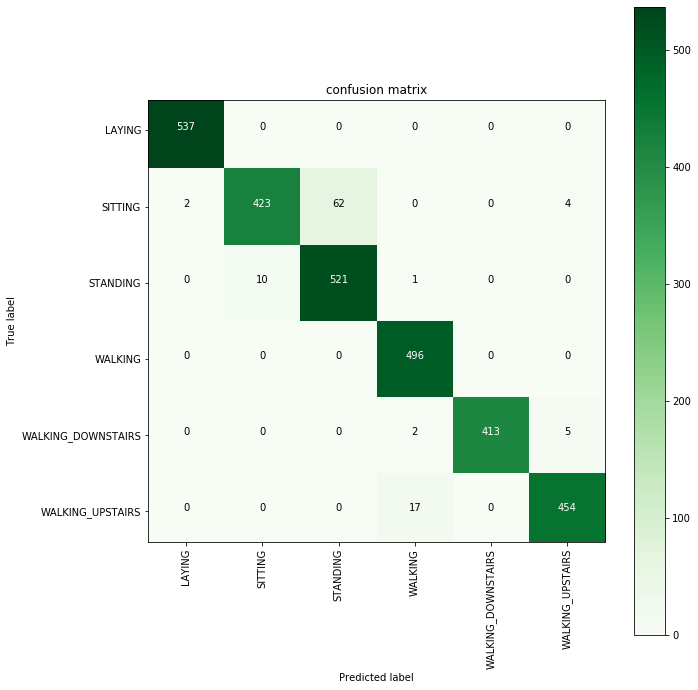

In [14]:
plt.figure(figsize=(10,10))
plt.grid(b=False)
plot_confusion_matrix(lin_svc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [15]:
# observe the attributes of the model 
print_gridSearch_attributes(lin_svc_grid_results['model'])


Best Estimator :  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)



Best parameters :  {'C': 1}



Total number of cross validation sets 3



Average Cross Validate scores of best estimator (Best score) 0.9465451577801959


##### <h1 style="color:green;text-align:left;">Observations: </h1>

+ Linear Support Vector Classification performs extreamly well for 'standing' ,'walking' and 'laying' activities.
+ 13% of the times it misclassifies 'sitting' as 'standing'.
+ 4% of the times it misclassifies 'walking upstairs' as 'walking'.
+ We got 94.6% accuracy using C= hyper parameter regularization.
+ It took 33 seconds for training the dataset which is faster than Logistic Regression.
+ We need to modify our model such that misclassification error of sitting and standing activities is reduced.



# 3.  RBF Kernel SVM with GridSearch



Training GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [2, 8, 16], 'gamma': [0.0078125, 0.125, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0) ....
Training Done.

Training_time(HH:MM:SS.ms) - 0:04:11.347763



Testing GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf'

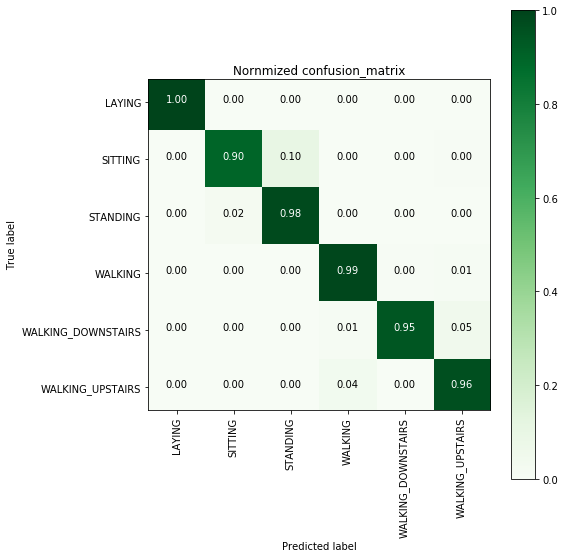

                          | Classifiction Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [16]:
from sklearn.svm import SVC
params = {'C':[2,8,16],'gamma':[0.0078125,0.125,2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=params,n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid,X_train,y_train,X_test,y_test,class_labels=labels)

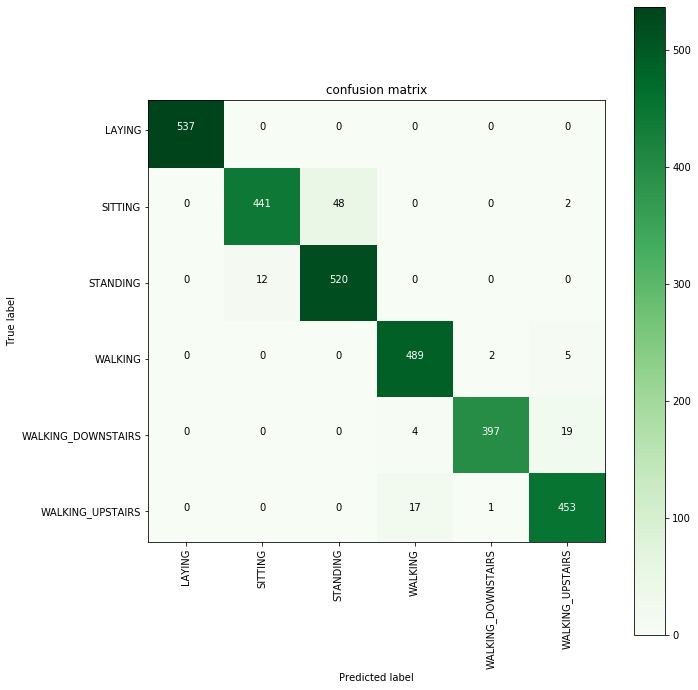

In [17]:
plt.figure(figsize=(10,10))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'],classes= labels, cmap=plt.cm.Greens)
plt.show()


In [18]:
# observe the attributes of the model 
print_gridSearch_attributes(lin_svc_grid_results['model'])

Best Estimator :  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)



Best parameters :  {'C': 1}



Total number of cross validation sets 3



Average Cross Validate scores of best estimator (Best score) 0.9465451577801959


<h1 style="color:green;text-align:left;">Observations: </h1>

+ RBF Kernel Support Vector Classification performs extreamly well for 'standing' ,'walking' and 'laying' activities.
+ 10% of the times it misclassifies 'sitting' as 'standing'.
+ 5% of the times it misclassifies 'walking upstairs' as 'walking downstairs'.
+ We got 94.65% accuracy using C=1 hyper parameter regularization.
+ It took 4 minuts 11 seconds for training the dataset which is faster than Logistic Regression.
+ We need to modify our model such that misclassification error of sitting and standing activities is reduced.


# 4. Decision Tree Classifier with GridSearch




Training GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': [3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

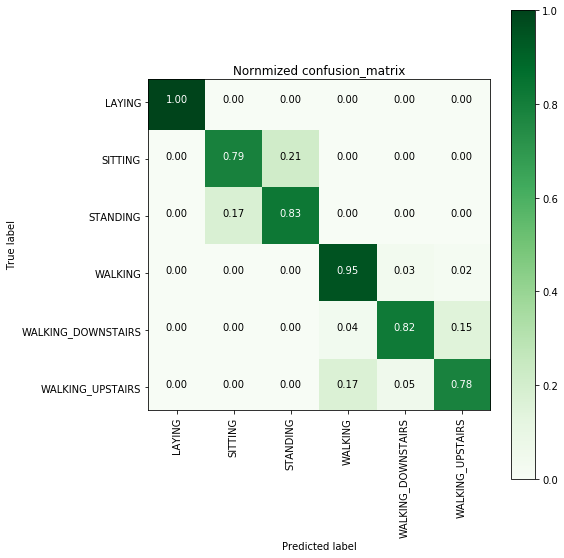

                          | Classifiction Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



In [19]:
from sklearn.tree import DecisionTreeClassifier
params = {'max_depth':[3,5,7,9]}
dec_tree = DecisionTreeClassifier()
dec_tree_grid = GridSearchCV(dec_tree,param_grid=params, n_jobs=-1)
dec_tree_grid_results = perform_model(dec_tree_grid,X_train,y_train,X_test,y_test,class_labels=labels)


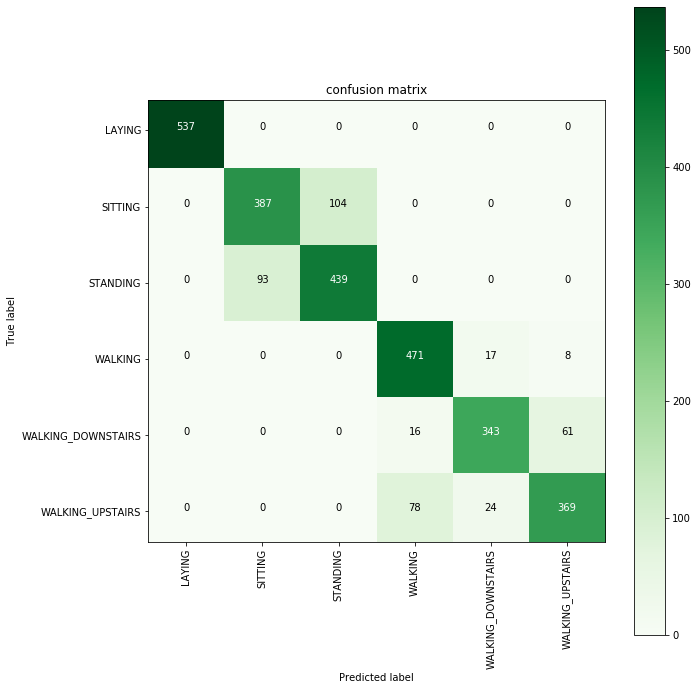

In [20]:
plt.figure(figsize=(10,10))
plt.grid(b=False)
plot_confusion_matrix(dec_tree_grid_results['confusion_matrix'],classes=labels,cmap=plt.cm.Greens)
plt.show()


In [21]:
# observe the attributes of the model 
print_gridSearch_attributes(dec_tree_grid_results['model'])


Best Estimator :  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')



Best parameters :  {'max_depth': 7}



Total number of cross validation sets 3



Average Cross Validate scores of best estimator (Best score) 0.838411316648531


<h1 style="color:green;text-align:left;">Observations: </h1>

+ Decision Tree Classifier performs extreamly well for 'laying' activity.
+ 21% of the times it misclassifies 'sitting' as 'standing'.
+ 17% of the times it misclassifies 'walking upstairs' as 'walking'.
+ We got 83.84% accuracy using C=2 hyper parameter regularization.
+ It took 12 seconds for training the dataset.
+ We need to modify our model and do proper tuning.

# 5. Random Forest Classifier with GridSearch



Training GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),


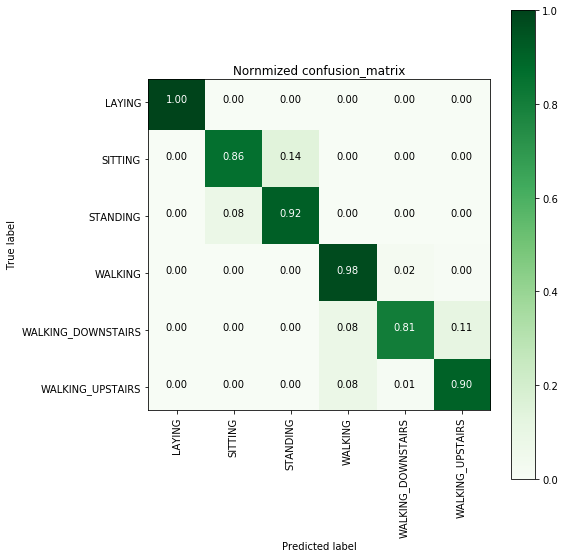

                          | Classifiction Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.86      0.88       491
          STANDING       0.87      0.92      0.90       532
           WALKING       0.87      0.98      0.92       496
WALKING_DOWNSTAIRS       0.95      0.81      0.87       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



In [22]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators':np.arange(10,201,20),'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc,param_grid=params,n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)


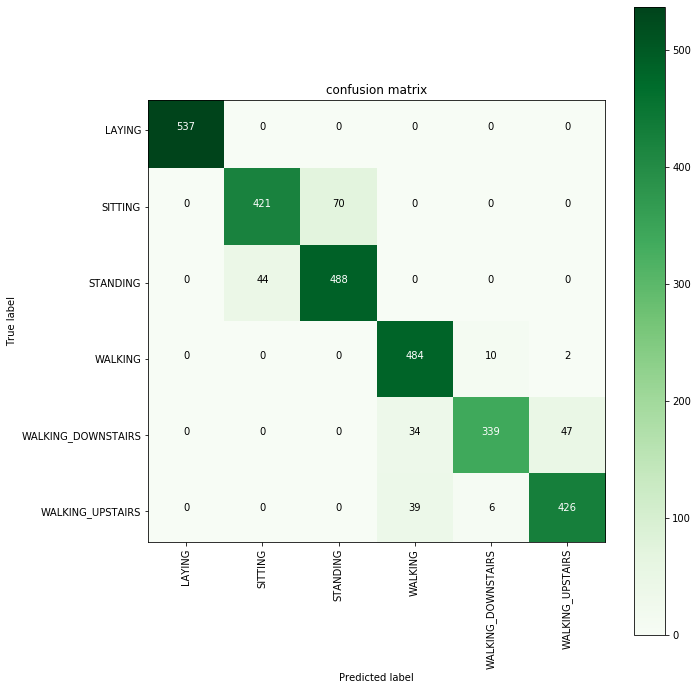

In [23]:
plt.figure(figsize=(10,10))
plt.grid(b=False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'],classes=labels,cmap=plt.cm.Greens)
plt.show()

In [24]:
# Observing best params of random forest classifier model
print_gridSearch_attributes(rfc_grid_results['model'])

Best Estimator :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)



Best parameters :  {'max_depth': 7, 'n_estimators': 190}



Total number of cross validation sets 3



Average Cross Validate scores of best estimator (Best score) 0.9156692056583242


<h1 style="color:green;text-align:left;">Observations: </h1>


+ Random Forest Classifier performs extreamly well for'laying' activity.
+ 14% of the times it misclassifies 'sitting' as 'standing'.
+ 8% of the times it misclassifies 'walking upstairs' as 'walking'.
+ We got 91.56% accuracy using C=2 hyper parameter regularization.
+ It took 4 minuts 50 seconds for training the dataset.
+ We need to modify our model such that misclassification errors can be reduced.



# 6.  Gradient Boosting Classifier Trees With GridSearch




Training GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                          

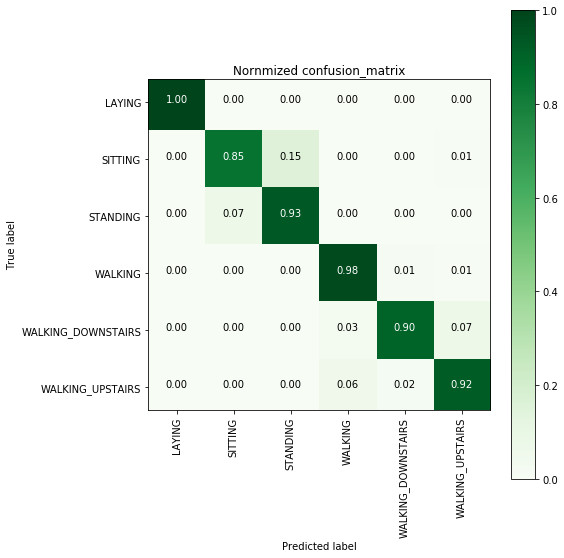

                          | Classifiction Report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.85      0.88       491
          STANDING       0.87      0.93      0.90       532
           WALKING       0.92      0.98      0.95       496
WALKING_DOWNSTAIRS       0.96      0.90      0.93       420
  WALKING_UPSTAIRS       0.93      0.92      0.92       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [25]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators':[12,50]}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt,param_grid=params,n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)


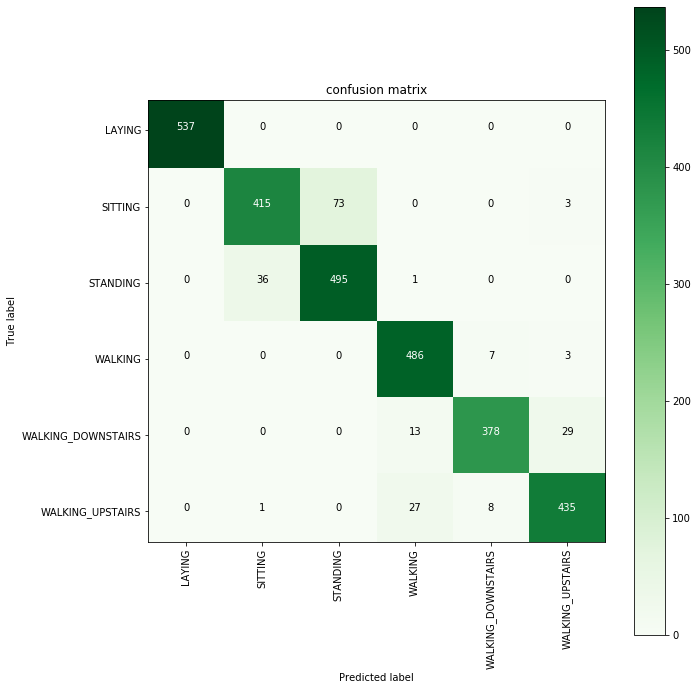

In [26]:
plt.figure(figsize=(10,10))
plt.grid(b=False)
plot_confusion_matrix(gbdt_grid_results['confusion_matrix'],classes=labels,cmap=plt.cm.Greens)
plt.show()

In [27]:
# getting best parameters for gbdt
print_gridSearch_attributes(gbdt_grid_results['model'])

Best Estimator :  GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)



Best parameters :  {'n_estimators': 50}



Total number of cross validation sets 3



Average Cross Validate scores of best estimator (Best score) 0.9068280739934712


<h1 style="color:green;text-align:left;">Observations: </h1>


+ GBDT( Gradient Boosting Decision Tree) Classification performs extreamly well for 'walking' and 'laying' activities.
+ GBDT is very costly to train. It requires lots of hyperparameter tuning.
+ 15% of the times it misclassifies 'sitting' as 'standing'.
+ 6% of the times it misclassifies 'walking upstairs' as 'walking'.
+ We got 90.60% accuracy using n_estimaotes=50 ,hyper parameter,.Performance can be increased by increasing n_estimators.
+ It took 5 minuts and 10 seconds for training the dataset.


<h1 style="color:red;text-align:center;">Comparing all the models</h1>


In [44]:
list_of_models = ['log_reg_grid_result','lin_svc_grid_results','rbf_svm_grid_results',
                  'dec_tree_grid_results','rfc_grid_results','gbdt_grid_results']
print('\n                     Accuracy     Error        Training_time(HH.MM.SS.ms)')
print('                     ----------   --------    ----------------------------')
print('Logistic Regression : {:.04}%       {:.04}%       {}'.format(log_reg_grid_result['accuracy'] * 100,\
                                                  100-(log_reg_grid_result['accuracy'] * 100),log_reg_grid_result['training_time']))

print('Linear SVC          : {:.04}%       {:.04}%        {}'.format(lin_svc_grid_results['accuracy'] * 100,\
                                                        100-(lin_svc_grid_results['accuracy'] * 100),lin_svc_grid_results['training_time']))

print('rbf SVM classifier  : {:.04}%      {:.04}%        {}'.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100),rbf_svm_grid_results['training_time']))

print('DecisionTree        : {:.04}%      {:.04}%        {}'.format(dec_tree_grid_results['accuracy'] * 100,\
                                                        100-(dec_tree_grid_results['accuracy'] * 100),dec_tree_grid_results['training_time']))

print('Random Forest       : {:.04}%      {:.04}%        {}'.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100),rfc_grid_results['training_time']))
print('GradientBoosting DT : {:.04}%      {:.04}%         {}'.format(gbdt_grid_results['accuracy'] * 100,\
                                                        100-(gbdt_grid_results['accuracy'] * 100),gbdt_grid_results['training_time']))


                     Accuracy     Error        Training_time(HH.MM.SS.ms)
                     ----------   --------    ----------------------------
Logistic Regression : 96.44%       3.563%       0:01:45.633471
Linear SVC          : 96.5%       3.495%        0:00:33.674053
rbf SVM classifier  : 96.27%      3.733%        0:04:11.347763
DecisionTree        : 86.39%      13.61%        0:00:12.512508
Random Forest       : 91.45%      8.551%        0:04:50.789178
GradientBoosting DT : 93.18%      6.82%         0:05:04.433556


<h1 style="color:green;text-align:left;">Observations: </h1>

+ Logistic Regression ,Linear SVC and rbf SVM classifier has accuracy more than 96%.
+ Decision Tree is taking least time so it can be used for low latency system.
+ Linear SVC have best accuracy and optimal time as compared to other models.
+ Linear SVC have overall best performance. 
+ If time is not constraint , we can increase accuracy using GBDT model.


<h1 style="color:red;text-align:center;">Conclusion</h1>

> We are getting good accuracy using expert engineered features. In most of the model there is confusion between standing and sitting , walking and walking upstairs. Overall we are successfully predicting most of the time. Deep learning may enhance the performance.